## Os impactos do suicídio na pandemia

**Grupo**:
- Ana Beatiz 
- Andson 
- Bruna 
- Lucca
- Thiago

**Matéria**:

Projeto integrado: Storytelling

### Instalações

In [3]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install plotly
!pip3 install numpy
!pip3 install folium
!pip3 install wordcloud
!pip3 install bs4
#!pip3 install 
#!pip3 install 

### Bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import seaborn as sns
import matplotlib.patches as mpatches
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import requests
from bs4 import BeautifulSoup
import folium
import plotly.express as px

#### Análise comentários do Twitter

Esta análise visa 

Importando os dados

In [4]:
# WordCloud 1

twitter_NAM =pd.read_csv(r'./Data/twitter_1.csv', sep=',')

#Limpando os dados, retirando colunas desnecessárias
twitter_NAM= twitter_NAM.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_NAM.columns.values[0]= 'Usuário'
twitter_NAM.columns.values[1]= 'Data de postagem'
twitter_NAM.columns.values[2]= 'Texto'

#twitter_NAM.info()
twitter_NAM.head(8)

Usuário      Data de postagem  \
0      cherrywrxs  2021-05-10T19:07:55Z   
1      pipoca_sep  2021-05-10T18:43:03Z   
2  MathKavalcante  2021-05-10T18:20:18Z   
3   Madame_Cosett  2021-05-10T18:11:56Z   
4        Visatotn  2021-05-10T18:04:15Z   
5   H3LBERTGE0RGE  2021-05-10T17:29:04Z   
6     Lailapadua4  2021-05-10T17:20:31Z   
7      mary_sozzo  2021-05-10T17:12:28Z   

                                               Texto  
0  RT @aslion: tou tão desinteressada últimamente...  
1  Cortei a franja da Anna, ela se mexeu, ficou t...  
2  RT @aslion: tou tão desinteressada últimamente...  
3  RT @aslion: tou tão desinteressada últimamente...  
4  eu. não. consigo. mais. viver. nesse. país. te...  
5  que ódiokk\n\n@DynaRiotS2 @Mushro0mBoy bora en...  
6  @alarissamatos Já não consigo nem viver direit...  
7  Minha mente é um turbilhão mais eu consigo viv...

In [5]:
# WordCloud 2

twitter_SD =pd.read_csv(r'./Data/twitter_2.csv', sep=',')

twitter_SD= twitter_SD.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SD.columns.values[0]= 'Usuário'
twitter_SD.columns.values[1]= 'Data de postagem'
twitter_SD.columns.values[2]= 'Texto'

#twitter_SD.info()
twitter_SD.head(8)

Usuário      Data de postagem  \
0  bibi98209150  2021-05-11T21:37:40Z   
1      _Capela5  2021-05-11T21:21:59Z   
2       Oxe_imp  2021-05-11T21:14:45Z   
3   marquesa22_  2021-05-11T21:12:47Z   
4   louispiola2  2021-05-11T21:11:29Z   
5  DjGeanSilvaa  2021-05-11T20:57:17Z   
6    littlejezz  2021-05-11T20:46:34Z   
7  patriciaob13  2021-05-11T20:44:20Z   

                                               Texto  
0  @svenusblack @odiar_homem @beyangeI ta rindo p...  
1  Já tinha aqui umas mensagens para ajudar pesso...  
2  @guarana @elleir_cs @oocbrazil Eu vou suicidar...  
3  @brunamsss Amiga, o filme viajou demais na mai...  
4  @Killmyalma me queiro matar balear morir suicidar  
5  RT @biianbjb: gente, eu quero de fato me suici...  
6  Tirando a última parte da conversa, isso me le...  
7  Eu repito pra mim mesma q n tem nd q eu n ague...

In [6]:
# WordCloud 3

twitter_SC =pd.read_csv(r'./Data/twitter_3.csv', sep=',')

twitter_SC= twitter_SC.drop(['in_reply_to_screen_name','retweeted_status_screen_name', 'user_description', 'source', 'id', 'lang'],axis=1)
twitter_SC.columns.values[0]= 'Usuário'
twitter_SC.columns.values[1]= 'Data de postagem'
twitter_SC.columns.values[2]= 'Texto'

#twitter_SC.info()
twitter_SC.head(8)

Usuário      Data de postagem  \
0       yleunameem  2021-05-10T22:33:13Z   
1         __bieela  2021-05-10T22:33:08Z   
2        marieamts  2021-05-10T22:33:03Z   
3    jungkookincel  2021-05-10T22:32:52Z   
4  sarafonseca1893  2021-05-10T22:32:43Z   
5      peachjjinie  2021-05-10T22:32:38Z   
6         ifsfairy  2021-05-10T22:32:25Z   
7       padeiiroo2  2021-05-10T22:32:25Z   

                                               Texto  
0        coragem pra cometer suicídio só queria isso  
1         Já te falei vida do crime é suicidio lento  
2  RT @nacarulyna: nao ironicamente   suicídio es...  
3  RT @gatinhopodre: opiniao que provavelmente va...  
4  RT @ruuelmaa: Nem consigo imaginar o tamanho d...  
5  RT @mafleurjk: ⚠️ prevenção de suicídio ⚠️\r\n...  
6  tw // suicídio\r\n.\r\n.\r\n.\r\n.\r\n.\r\n.\r...  
7  @_haime_souza unica coisa impedindo meu suicid...

Gerando os WordClouds

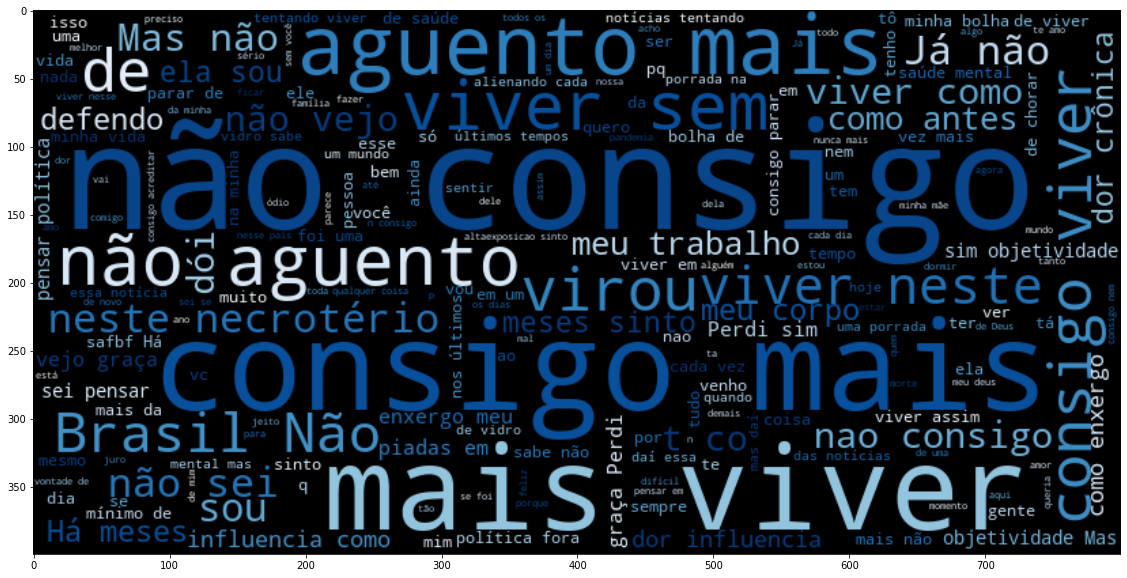

In [7]:
# WordCloud 1

# Texto com todas as palavras que a coluna 'Texto'
text = " ".join(review for review in twitter_NAM.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

# Criando stopwords paera remover as palavras indesejadas
stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "e", "pra", "o", "que", "t: co", "e ela", "paulo gustavo", "https", "Bolsonaro", "é", "veiadoscausos", "t  co", "Eu", "gustavo", "paulo  gustavo", "paulo"])

# Gerando a imagem da word cloud 
wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

# Exibição da imagem gerada pelo matplotlib 
plt.figure( figsize=(20,10))
plt.tight_layout(pad=0) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

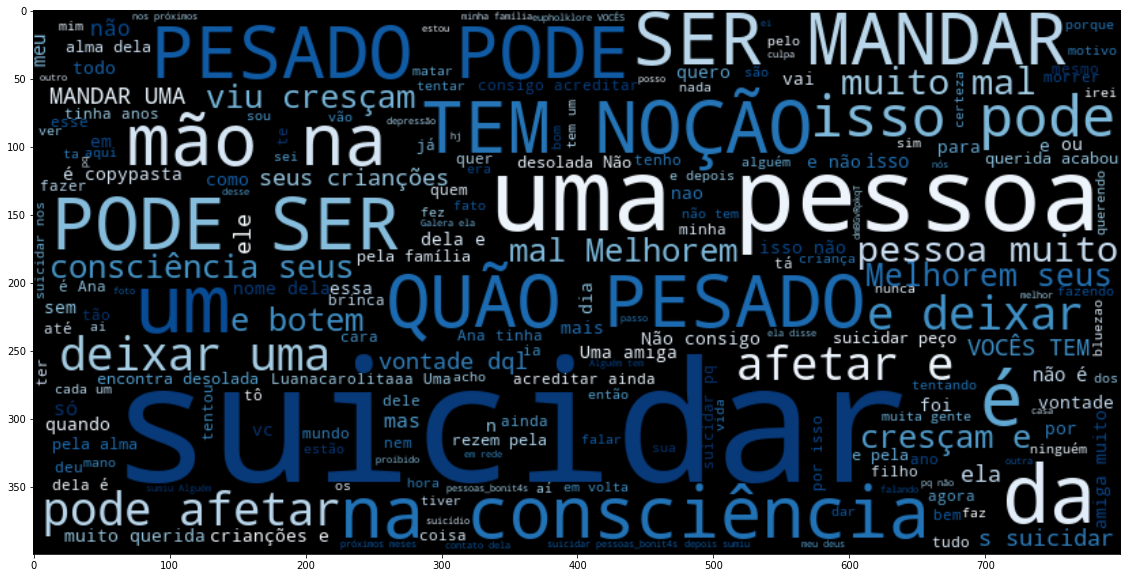

In [8]:
# WordCloud 2

text = " ".join(review for review in twitter_SD.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "porra", "imbecis", "Ldivino_ribeiro", " porra ", "que", "pra"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

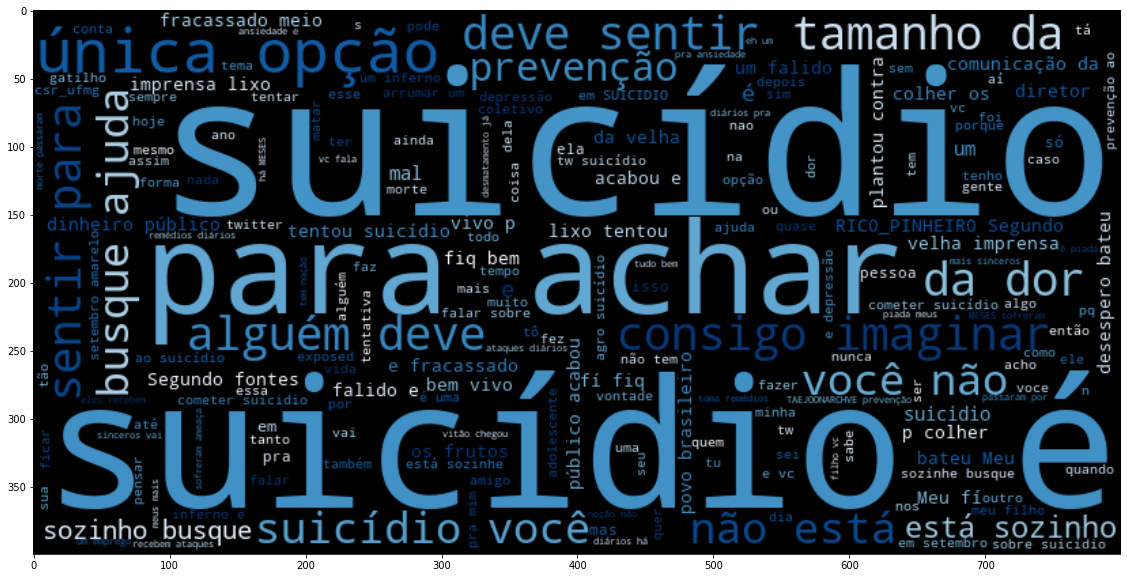

In [9]:
# WordCloud 3

text = " ".join(review for review in twitter_SC.Texto.astype(str))
#print ("There are {} words in the combination of all cells in column Texto.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(["RT", "@", "https", "t", "de", "t  co", "q", "o", "se", "eu", "vou", "co", "ruuelmaa", "Nem", "NuXfIsTwjc", "byangells", "fuder", "whindersson", "mamata", "luisa", "RICO_PINHEIRO", "EstadaoFake", "que"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black",  colormap='Blues', width=800, height=400).generate(text)

plt.figure( figsize=(20,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

#### Análise relatórios mensais do CVV (Centro de Valorização a Vida)

Analisando os gráficos mensais de Janeiro de 2020 até Março de 2021, no qual constam tempo de atendimento por faixas de tempe nota-se que o tempo varia de menos de 1 minuto até mais de 1 horas de ligação


Importando os dados

In [10]:
colunas = ["mes", "ano", "vla", "vlp", "ar", "af", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba"]
dados= pd.read_csv('./Data/CVV_analise.csv', sep=";", header=0, names=colunas)
dados.head(8)

mes   ano     vla    vlp      ar      af       mtp    nsp    nrj  \
0    Janeiro  2020  311716  67236   27819  283897  00:06:44  88545  38875   
1  Fevereiro  2020  283387  63253   22627  260760  00:06:48  75267  34067   
2      Março  2020  255298  77626   41438  213860  00:07:11  77484  32909   
3      Abril  2020  242528  66381  151672   90856  00:07:14  74228  30847   
4       Maio  2020  232930  59300  156779   76151  00:07:44  67817  29831   
5      Junho  2020  219604  59630  148352   71252  00:07:46  68229  26277   
6      Julho  2020  233925  64349  157988   75937  00:07:43  77131  29349   
7     Agosto  2020  258919  59965  173893   85026  00:07:10  81909  28007   

     nmg    nrs    npe    npr    nba  
0  36803  40858  20153  11846  12633  
1  33565  33160  21350  11529  14570  
2  29863  29029  18684  12797  14996  
3  30187  25305  25305  11727  14614  
4  28306  25871  16572  11892  13103  
5  24833  24595  15312  12472  12466  
6  26735  26212  13286  13755  12897  
7  28676  31043  15708  15809  17525

In [11]:
def converter_tempo_numero(x):
    return int(x[3:5]) + int(x[6:8])/60
    
dados['mt'] = dados.mtp.apply(converter_tempo_numero)

In [12]:
dados["mes_ano"] = dados["ano"].apply(int)
dados["mes_ano"] = dados["mes_ano"].apply(str)
dados["mes_ano"] = dados["mes"] + " " + dados["mes_ano"]
dados.head(8)

mes   ano     vla    vlp      ar      af       mtp    nsp    nrj  \
0    Janeiro  2020  311716  67236   27819  283897  00:06:44  88545  38875   
1  Fevereiro  2020  283387  63253   22627  260760  00:06:48  75267  34067   
2      Março  2020  255298  77626   41438  213860  00:07:11  77484  32909   
3      Abril  2020  242528  66381  151672   90856  00:07:14  74228  30847   
4       Maio  2020  232930  59300  156779   76151  00:07:44  67817  29831   
5      Junho  2020  219604  59630  148352   71252  00:07:46  68229  26277   
6      Julho  2020  233925  64349  157988   75937  00:07:43  77131  29349   
7     Agosto  2020  258919  59965  173893   85026  00:07:10  81909  28007   

     nmg    nrs    npe    npr    nba        mt         mes_ano  
0  36803  40858  20153  11846  12633  6.733333    Janeiro 2020  
1  33565  33160  21350  11529  14570  6.800000  Fevereiro 2020  
2  29863  29029  18684  12797  14996  7.183333      Março 2020  
3  30187  25305  25305  11727  14614  7.233333      Abril 2020  
4  28306  25871  16572  11892  13103  7.733333       Maio 2020  
5  24833  24595  15312  12472  12466  7.766667      Junho 2020  
6  26735  26212  13286  13755  12897  7.716667      Julho 2020  
7  28676  31043  15708  15809  17525  7.166667     Agosto 2020

In [13]:
cidades = dados.drop(['mes','ano','vla','vlp','ar','af','mtp', 'mt'], axis = 1)
cidades.head(8)

nsp    nrj    nmg    nrs    npe    npr    nba         mes_ano
0  88545  38875  36803  40858  20153  11846  12633    Janeiro 2020
1  75267  34067  33565  33160  21350  11529  14570  Fevereiro 2020
2  77484  32909  29863  29029  18684  12797  14996      Março 2020
3  74228  30847  30187  25305  25305  11727  14614      Abril 2020
4  67817  29831  28306  25871  16572  11892  13103       Maio 2020
5  68229  26277  24833  24595  15312  12472  12466      Junho 2020
6  77131  29349  26735  26212  13286  13755  12897      Julho 2020
7  81909  28007  28676  31043  15708  15809  17525     Agosto 2020

In [14]:
# Gráfico 5

atendimento = dados.drop(["mes", "ano", "vla", "vlp", "mtp", "nsp", "nrj", "nmg", "nrs", "npe", "npr", "nba", "mt"], axis = 1)
atendimento.dropna(inplace=True)
atendimento.head(8)

ar      af         mes_ano
0   27819  283897    Janeiro 2020
1   22627  260760  Fevereiro 2020
2   41438  213860      Março 2020
3  151672   90856      Abril 2020
4  156779   76151       Maio 2020
5  148352   71252      Junho 2020
6  157988   75937      Julho 2020
7  173893   85026     Agosto 2020

Gerando os gráficos

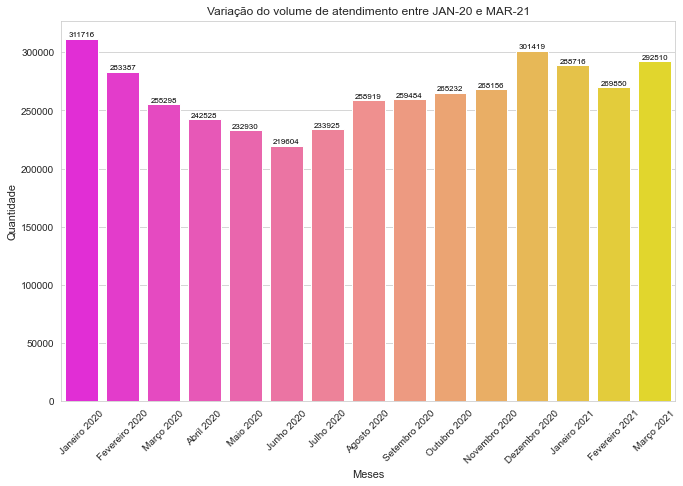

In [15]:
# Gráfico 1

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vla", errwidth=0, palette= 'spring')
ax.set_title('Variação do volume de atendimento entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

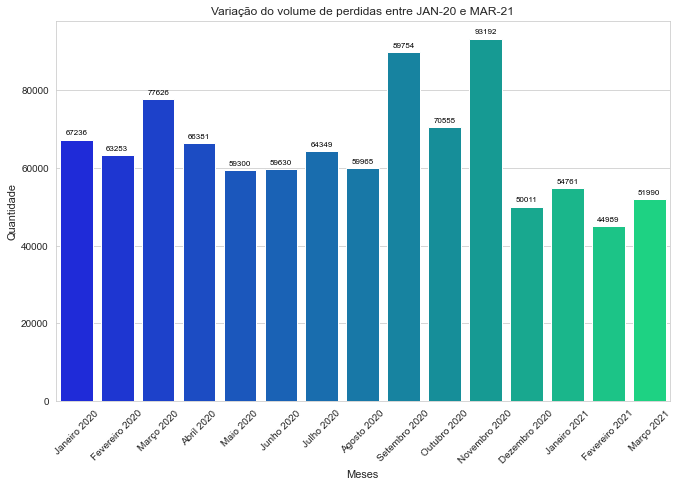

In [16]:
# Gráfico 2

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "vlp", errwidth=0, palette='winter')
ax.set_title('Variação do volume de perdidas entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(int(i.get_height()), (i.get_x() + i.get_width()/2, i.get_height()+1000), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

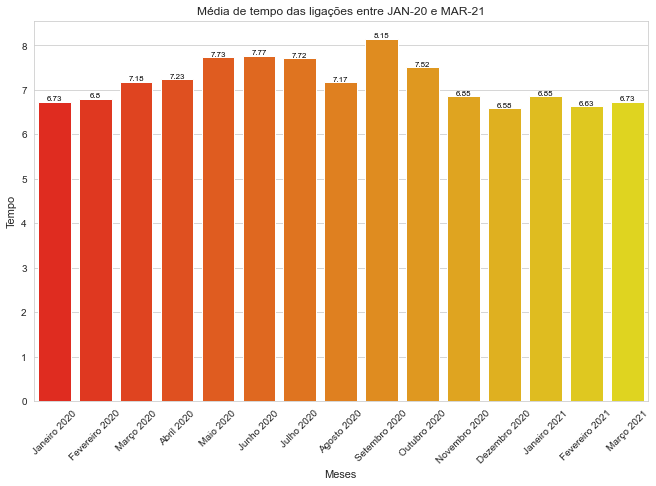

In [17]:
# Gráfico 3

sns.set_style('whitegrid')
ax = sns.barplot(data = dados, x = "mes_ano", y = "mt", errwidth=0, palette= 'autumn')
ax.set_title('Média de tempo das ligações entre JAN-20 e MAR-21')
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Tempo', fontsize=11)
plt.xticks(rotation=45)
plt.gcf().set_size_inches(11, 7)
for i in ax.patches:
    plt.annotate(round(i.get_height(),2), (i.get_x() + i.get_width()/2, i.get_height()), ha='center', va= 'baseline', fontsize=8, color='black', xytext=(0,1), textcoords='offset points')
plt.show()

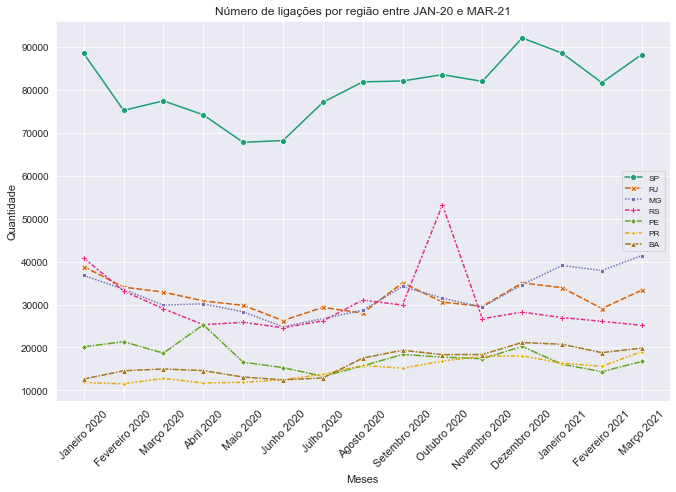

In [18]:
# Gráfico 4

sns.set_style('darkgrid')
plt.title('Número de ligações por região entre JAN-20 e MAR-21')
ax = sns.lineplot(data = cidades, palette='Dark2', markers=True, legend= False)
plt.legend(loc= 'center right', labels= ['SP', 'RJ', 'MG', 'RS', 'PE', 'PR', 'BA', 'X'], fontsize= 8.4)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,15))))
ax.set_xticklabels(cidades['mes_ano'])
ax.set_xlabel('Meses', fontsize=11)
ax.set_ylabel('Quantidade', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], rotation=45, fontsize=11)
plt.gcf().set_size_inches(11, 7)
plt.show()

In [19]:
# Gráfico 5

graf1 = go.Bar(x=atendimento['mes_ano'], y=atendimento["af"], name = 'Físico', marker = {'color': '#98fb98'})
graf2 = go.Bar(x=atendimento['mes_ano'], y=atendimento["ar"], name = 'Remoto', marker = {'color': '#fa8072'})
data = [graf1, graf2]
layout = go.Layout(title='Classificação dos atendimentos entre JAN-20 e MAR-21',
                   yaxis={'title':'Quantidade'},
                   xaxis={'title': 'Meses'},
                   barmode="stack", height=600, width=1000)
fig = go.Figure(data= data, layout=layout)                
py.iplot(fig)

#### Análise Google trends

Importando os dados

In [20]:
# Gráfico 1

colunas = ['semana_2020', 'porcentagem_2020', 'semana_2019', 'porcentagem_2019']
suicide_searches = pd.read_csv(r'./Data/multiTimeline.csv', sep=',', header=0, names=colunas)

#suicide_searches.info()
suicide_searches.head(8)

semana_2020  porcentagem_2020 semana_2019  porcentagem_2019
0  2020-01-05                53  2019-01-06                52
1  2020-01-12                50  2019-01-13                50
2  2020-01-19                53  2019-01-20                50
3  2020-01-26                51  2019-01-27                49
4  2020-02-02                49  2019-02-03                67
5  2020-02-09                51  2019-02-10                53
6  2020-02-16                63  2019-02-17                56
7  2020-02-23                51  2019-02-24                61

In [21]:
# Gráfico 2

colunas = ['Semana','Japão', 'Brasil', 'Estados Unidos']
bra_eua_jap_searches= pd.read_csv(r'./Data/multiTimeline cópia.csv', sep= ',', header=0, names=colunas)
#bra_eua_jap_searches = bra_eua_jap_searches.drop([0,1], axis=0)

#bra_eua_jap_searches.info()
bra_eua_jap_searches.head(8)

Semana  Japão  Brasil  Estados Unidos
0  2020-01-05     26      11              13
1  2020-01-12     16      10              15
2  2020-01-19     13      14              16
3  2020-01-26     16      12              15
4  2020-02-02     16      11              15
5  2020-02-09     14      10              15
6  2020-02-16     22      11              17
7  2020-02-23     14      10              15

In [22]:
# Gráfico 3

geo = pd.read_csv("./Data/geoMap.csv", header=0, names=['pais', '2020', '2019'])
geo.dropna(inplace=True)

# geo.info()
geo.head(8)

pais  2020  2019
0           Japão    58    42
1        Paraguai    38    62
2             Irã    51    49
3        Colômbia    37    63
4   Coreia do Sul    50    50
5         Turquia    44    56
6  Estados Unidos    47    53
7          Brasil    41    59

Gerando gráfico

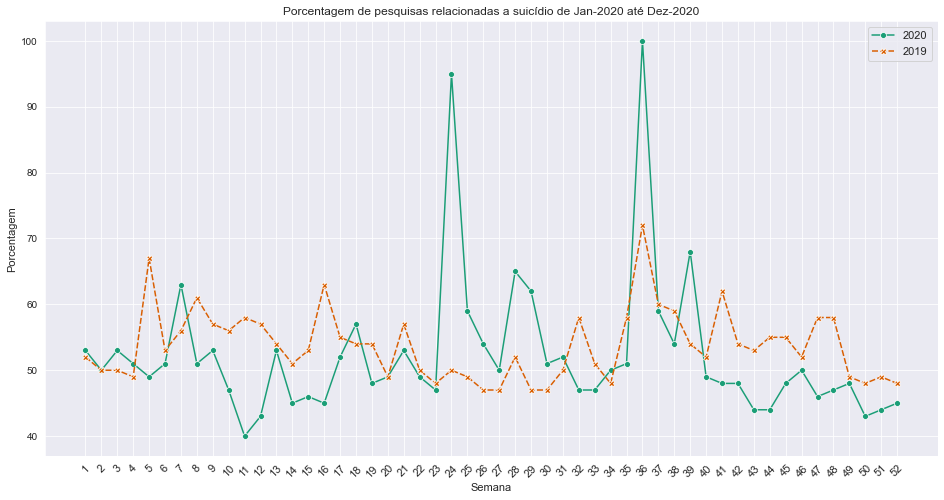

In [23]:
# Gráfico 1

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020')
ax = sns.lineplot(data = suicide_searches, palette='Dark2', markers=True, legend= False)
plt.legend(loc= 'upper right', labels= ['2020', '2019'], fontsize= 11)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,52))))
ax.set_xticklabels(list(range(1,53)))
ax.set_xlabel('Semana', fontsize=11)
ax.set_ylabel('Porcentagem', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], rotation=45, fontsize=11)
plt.show()

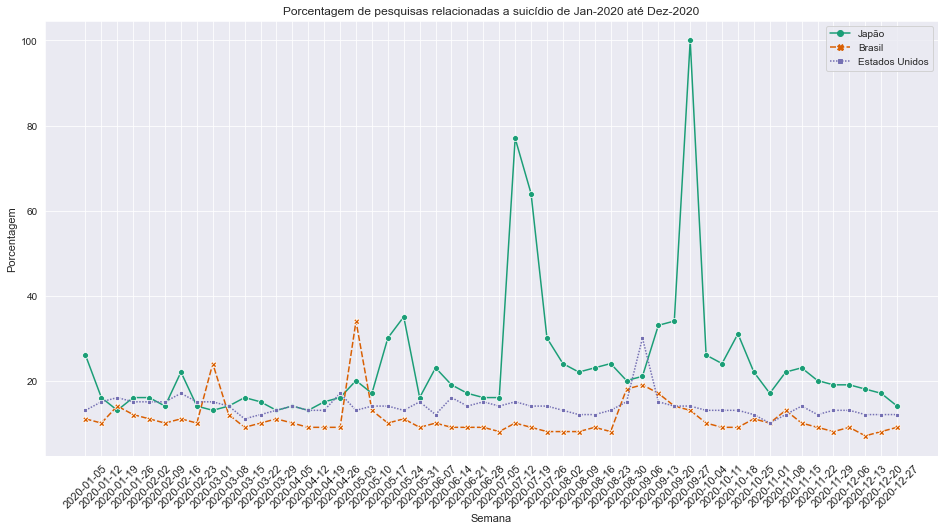

In [24]:
# Gráfico 2

sns.set_style('darkgrid')
plt.figure(figsize=(16,8))
plt.title('Porcentagem de pesquisas relacionadas a suicídio de Jan-2020 até Dez-2020')
ax = sns.lineplot(data = bra_eua_jap_searches, palette='Dark2', markers=True) #legend= False)
ax.xaxis.set_major_locator(mticker.FixedLocator(list(range(0,52))))
ax.set_xticklabels(bra_eua_jap_searches['Semana'])
ax.set_xlabel('Semana', fontsize=11)
ax.set_ylabel('Porcentagem', fontsize=11)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51], rotation=45, fontsize=11)
plt.show()

In [25]:
# Gráfico 3

graf1 = go.Bar(x=geo["pais"], y=geo["2019"], name = '2019', marker = {'color': '#00bfff'})
graf2 = go.Bar(x=geo["pais"], y=geo["2020"], name = '2020', marker = {'color': '#ffd700'})
data = [graf1, graf2]
layout = go.Layout(title='Comparação de pesquisas sobre suicídio entre 2019 e 2020',
                   yaxis={'title':'Porcentagem'},
                   xaxis={'title': 'Países'},
                   barmode="stack",
                   height=600, width=1000)
fig = go.Figure(data=data, layout=layout)                
py.iplot(fig)

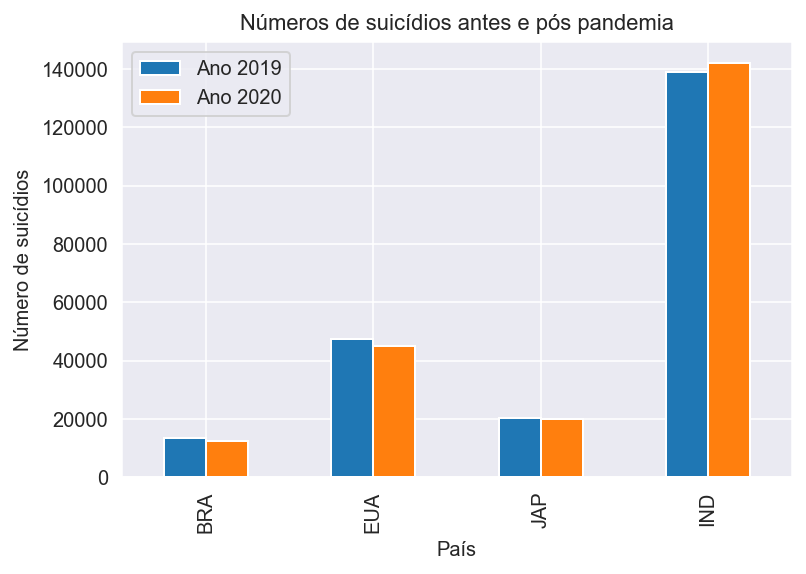

In [26]:
# Gráficos 4

plt.rcParams["figure.figsize"] = [6,4]
%config InlineBackend.figure_format = 'retina'

#pd.Series([65, 61, 25, 22]).plot(kind="bar")
plotdata = pd.DataFrame({"Suicídios": [65, 61, 25, 22]})
plotdata = pd.DataFrame({
    "Ano 2019":[13467, 47511, 20169, 139065],
    "Ano 2020":[12325, 44834, 20081, 142000]
    }, 
    index=["BRA", "EUA", "JAP", "IND"]
)
plotdata.plot(kind="bar")
plt.title("Números de suicídios antes e pós pandemia", fontsize= 11)
plt.xlabel("País", fontsize= 10)
plt.ylabel("Número de suicídios", fontsize= 10)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.show()

### Análise do site 

Importando os dados

In [34]:
nome_dataset = 'atlas_violencia_dados-series'
df = pd.read_csv('./Data/suicidios.csv', sep= ';')
df.columns.values[5]= 'data'
# display(df)
# df.head(8)

df.loc[ df['data'] == '2017-' ].head(8)

cod nome           nome_comp    lat    lon   data   valor
1026   50   MS  Mato Grosso do Sul -20.51 -54.54  2017-   259.0
1027   42   SC      Santa Catarina -27.45 -50.95  2017-   739.0
1028   41   PR              Paraná -24.89 -51.55  2017-   774.0
1029   35   SP           São Paulo -22.19 -48.79  2017-  2306.0
1030   33   RJ      Rio de Janeiro -22.25 -42.66  2017-   607.0
1031   32   ES      Espírito Santo -19.19 -40.34  2017-   207.0
1032   31   MG        Minas Gerais -18.10 -44.38  2017-  1515.0
1033   29   BA               Bahia -13.29 -41.71  2017-   603.0

In [16]:
df.loc[ df['data'] == '2017-' ]
lst_datas = list(df['data'].unique())
# lst_datas

def calc_raio(n):
    if (n < 0):
        return 0
    return (int((np.log(n + 1.00001))) + 0.2) * 1000

def extrair_lat_lon(df, i):
    return [df_mapa.iloc[i]['lat'], df_mapa.iloc[i]['lon']]

datas_dic = {}
col_data = df['data']
for data in lst_datas:
    datas_dic[data] = df.loc[col_data == data]

Gerando o gráfico

In [32]:
df_data = datas_dic['2017-']
nm_coluna_x = "nome_comp"
nm_coluna_y = "valor"
qtde_municipios = 27
data_analise = df_data.iloc[0]['data']

df_sorted = df_data.sort_values('valor', ascending=False)

fig = px.scatter(
df_sorted.head(qtde_municipios),
x = nm_coluna_x,
y = nm_coluna_y,
size = nm_coluna_y,
color = nm_coluna_x,
hover_name = nm_coluna_x,
size_max = 60)

fig.update_layout(
title = str(qtde_municipios) +" municipios com vítimas de suicídio em 2017 ",
xaxis_title = "Municipios",
yaxis_title = "Vítimas",
width = 1200, height= 700)
fig.show()